In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


In [2]:
df_main = pd.read_csv("/kaggle/input/credit-score-classification/train.csv", dtype={26: str})

In [3]:
df_main.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [4]:
columns = df_main.columns
columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df_main,
                               missing_rate = 0.03)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        97016 non-null  object 
 1   Customer_ID               97067 non-null  object 
 2   Month                     97035 non-null  object 
 3   Name                      87336 non-null  object 
 4   Age                       97020 non-null  object 
 5   SSN                       97055 non-null  object 
 6   Occupation                96972 non-null  object 
 7   Annual_Income             97098 non-null  object 
 8   Monthly_Inhand_Salary     82547 non-null  float64
 9   Num_Bank_Accounts         97090 non-null  float64
 10  Num_Credit_Card           97071 non-null  float64
 11  Interest_Rate             97066 non-null  float64
 12  Num_of_Loan               96991 non-null  object 
 13  Type_of_Loan              85932 non-null  object 
 14  Delay

In [7]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,82547.000000,97090.000000,97071.000000,97066.000000,97035.000000,95214.000000,96993.000000,97063.000000
mean,4196.362719,17.254269,22.507052,72.889488,21.079002,27.776083,32.288652,1401.855103
std,3182.568009,118.266661,129.204753,468.097739,14.864451,193.548066,5.118116,8299.359811
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1626.594167,3.000000,4.000000,8.000000,10.000000,3.000000,28.051880,30.306660
50%,3097.624167,6.000000,5.000000,13.000000,18.000000,6.000000,32.310864,69.246684
75%,5964.883333,7.000000,7.000000,20.000000,28.000000,9.000000,36.502933,161.078485
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [9]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

ID                           2984
Customer_ID                  2933
Month                        2965
Name                        12664
Age                          2980
SSN                          2945
Occupation                   3028
Annual_Income                2902
Monthly_Inhand_Salary       17453
Num_Bank_Accounts            2910
Num_Credit_Card              2929
Interest_Rate                2934
Num_of_Loan                  3009
Type_of_Loan                14068
Delay_from_due_date          2965
Num_of_Delayed_Payment       9780
Changed_Credit_Limit         2887
Num_Credit_Inquiries         4786
Credit_Mix                   2953
Outstanding_Debt             2932
Credit_Utilization_Ratio     3007
Credit_History_Age          11766
Payment_of_Min_Amount        2910
Total_EMI_per_month          2937
Amount_invested_monthly      7327
Payment_Behaviour            2980
Monthly_Balance              4100
Credit_Score                 2920
dtype: int64


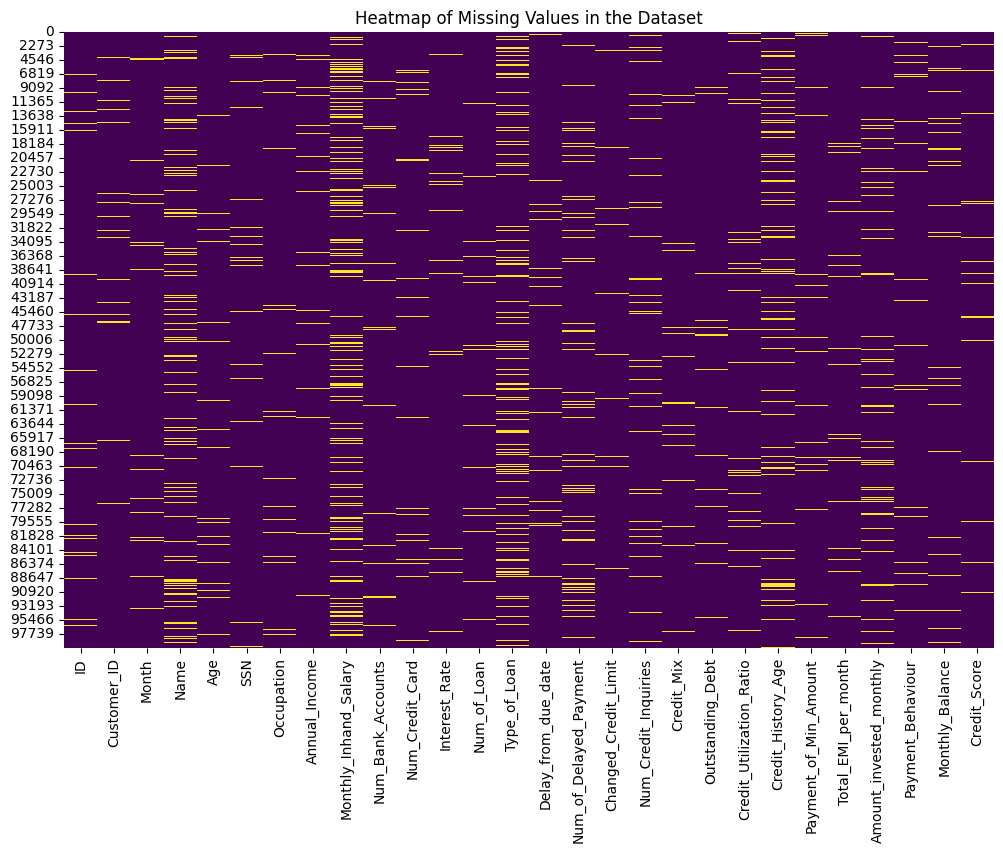

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap='viridis')
plt.title('Heatmap of Missing Values in the Dataset')
plt.show()

Yellow sections represent missing values

In [11]:
#info per customer
perCustomer = df.groupby('Customer_ID').size().reset_index(name='count')
print(perCustomer)

      Customer_ID  count
0      CUS_0x1000      8
1      CUS_0x1009      8
2      CUS_0x100b      8
3      CUS_0x1011      7
4      CUS_0x1013      8
...           ...    ...
12495   CUS_0xff3      7
12496   CUS_0xff4      7
12497   CUS_0xff6      8
12498   CUS_0xffc      8
12499   CUS_0xffd      8

[12500 rows x 2 columns]


In [12]:
#see avg record per customer and std (std to see if major customers have close records)
avg_per_customer_record = perCustomer['count'].mean()
print("Per Customer Record AVG : " + str(avg_per_customer_record))
perCustomer.groupby('count').size().reset_index(name='record')

Per Customer Record AVG : 7.76536


,count,record
0,5,17
1,6,227
2,7,2428
3,8,9828


In [13]:
num_ats = df.select_dtypes(include=['float64']).columns.tolist()
num_ats

['Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month']

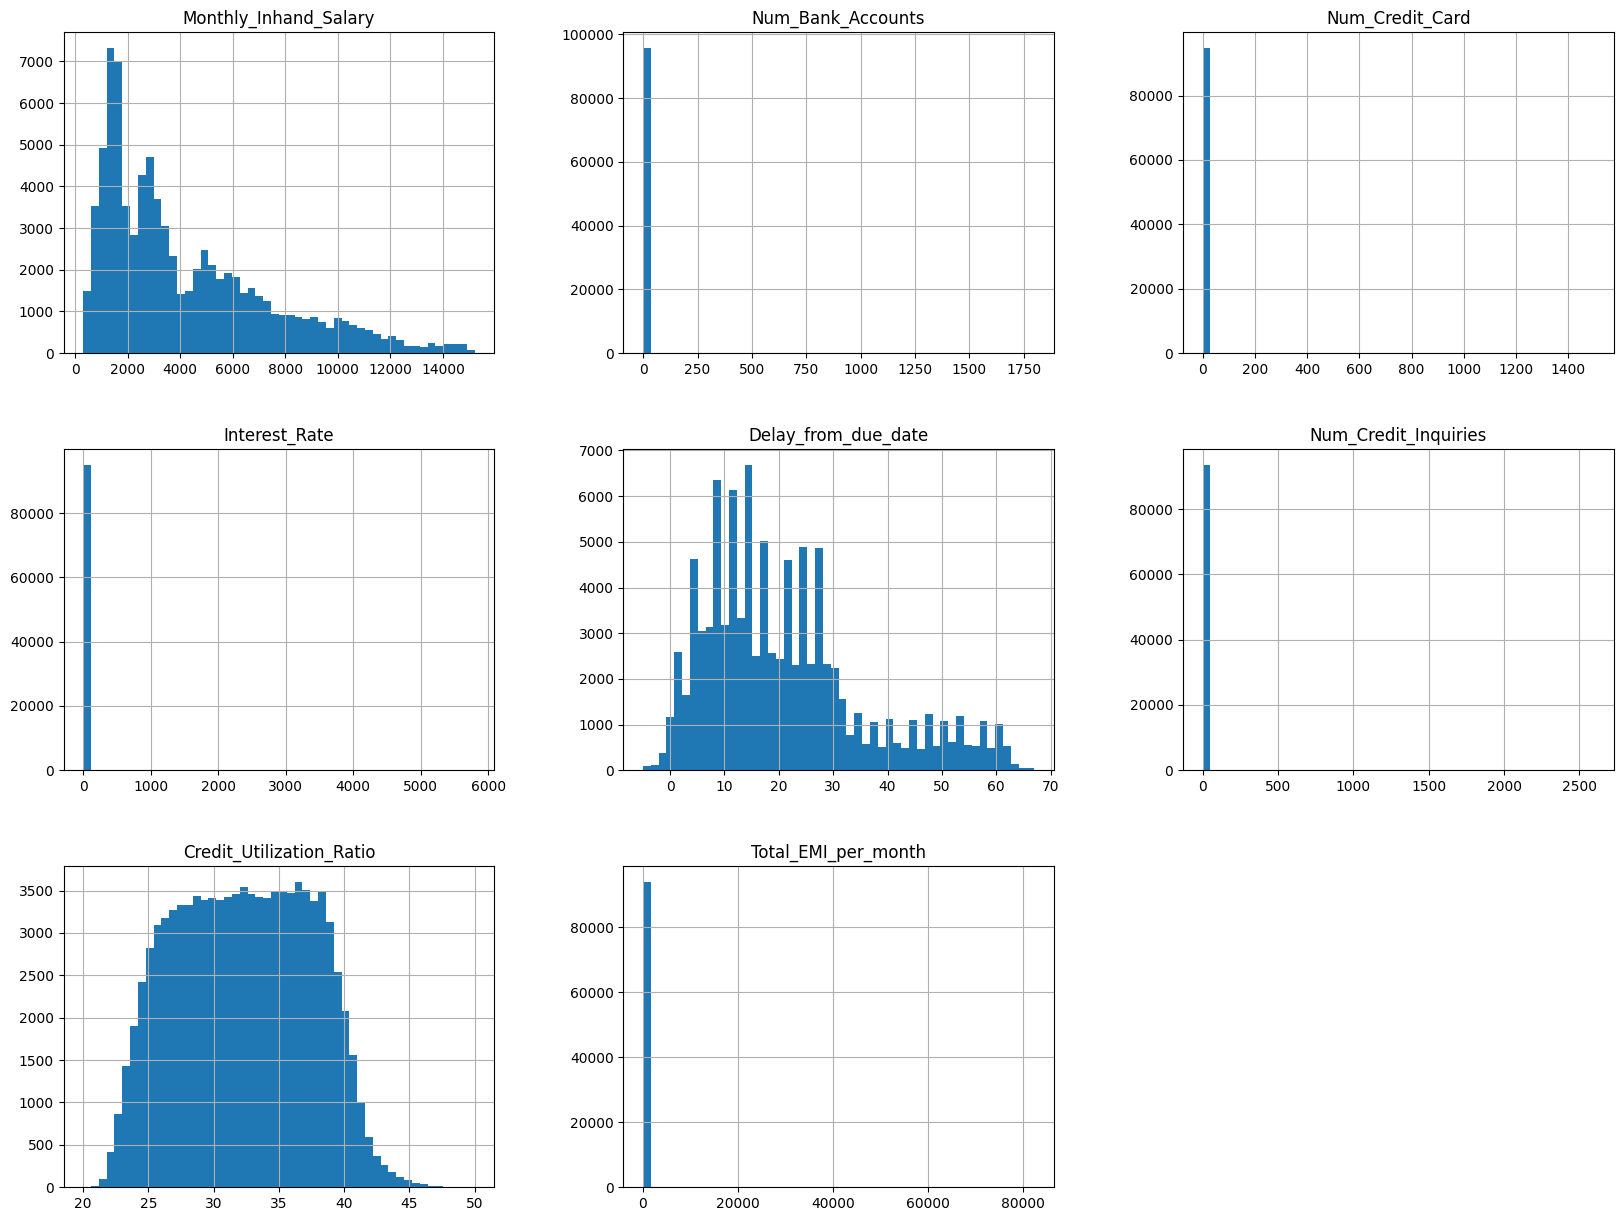

In [14]:
# Histograms for each numerical attribute
df.hist(bins=50, figsize=(20,15))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


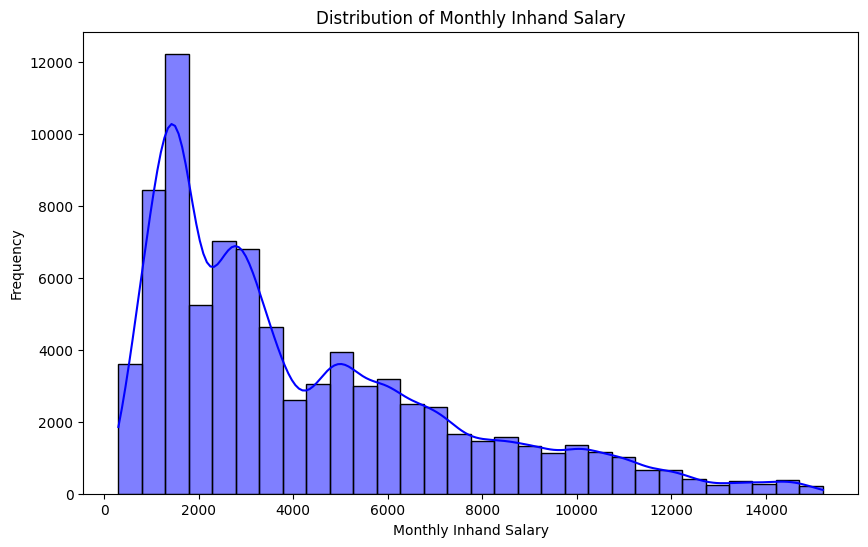

In [15]:
# Histogram with KDE for Monthly Inhand Salary
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly_Inhand_Salary'], kde=True, color='blue', bins=30)
plt.title('Distribution of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_17/2050284415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Num_Bank_Accounts_Log'] = np.log1p(filtered_df['Num_Bank_Accounts'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


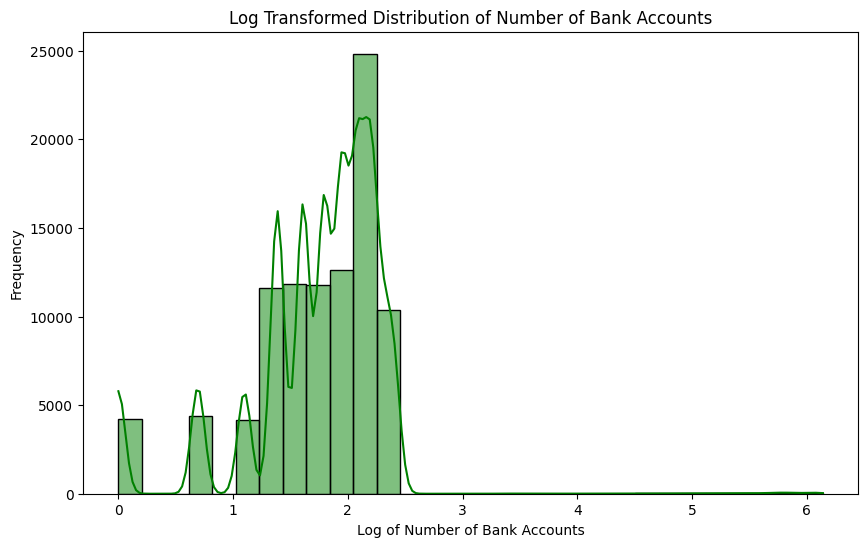

In [16]:
common_range = df['Num_Bank_Accounts'].quantile(0.99)  # Adjusting to 99th percentile
filtered_df = df[df['Num_Bank_Accounts'] <= common_range]

filtered_df['Num_Bank_Accounts_Log'] = np.log1p(filtered_df['Num_Bank_Accounts'])

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Num_Bank_Accounts_Log'], bins=30, kde=True, color='green')
plt.title('Log Transformed Distribution of Number of Bank Accounts')
plt.xlabel('Log of Number of Bank Accounts')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


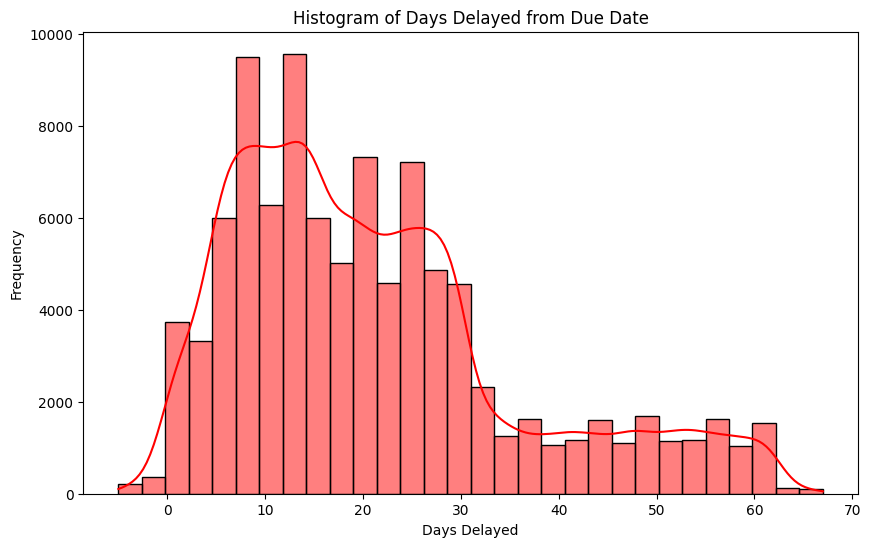

In [17]:
# Histogram for 'Delay_from_due_date'
plt.figure(figsize=(10, 6))
sns.histplot(df['Delay_from_due_date'], bins=30, kde=True, color='red')
plt.title('Histogram of Days Delayed from Due Date')
plt.xlabel('Days Delayed')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


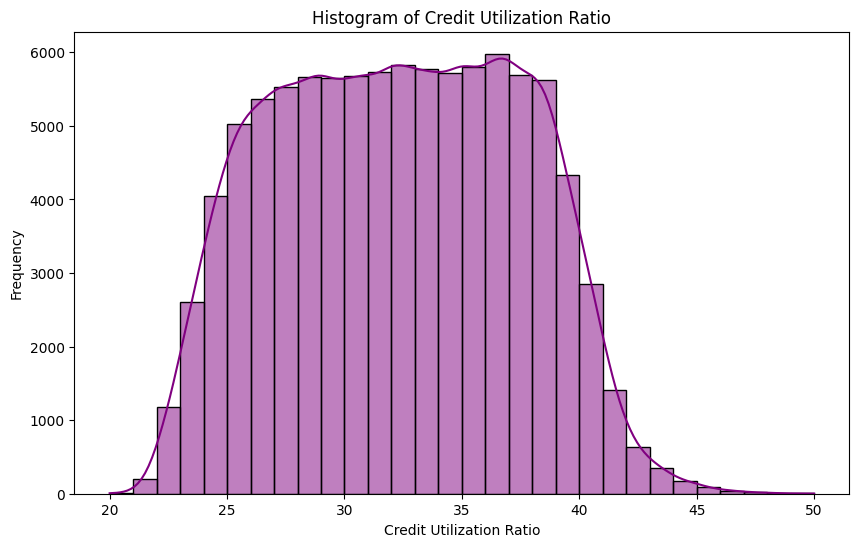

In [18]:
# Histogram for 'Credit_Utilization_Ratio'
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_Utilization_Ratio'], bins=30, kde=True, color='purple')
plt.title('Histogram of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')
plt.show()

In [19]:
# List of categorical columns
categorical_cols = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour']

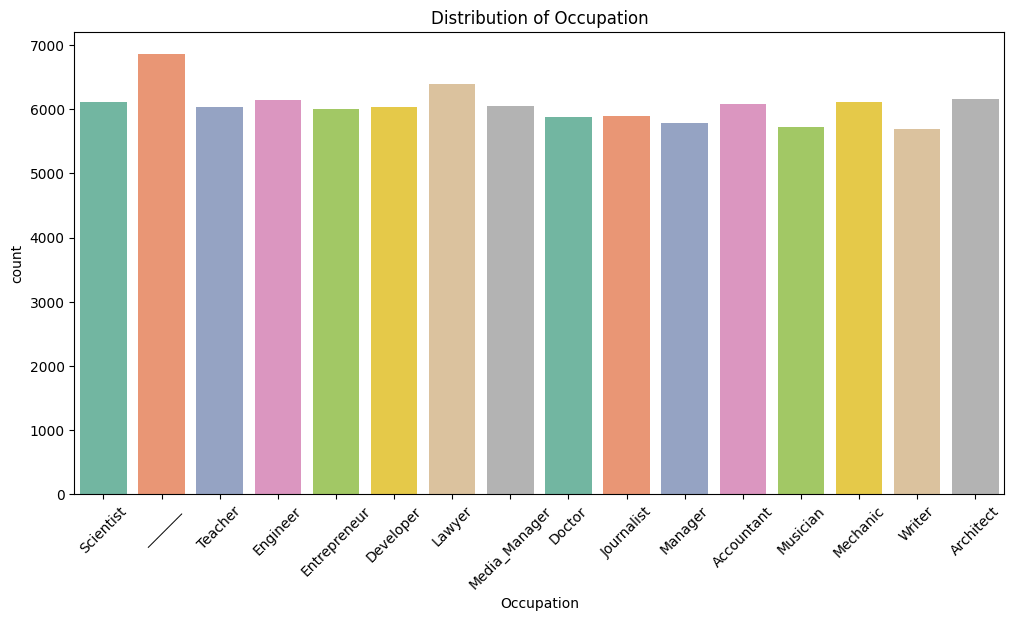

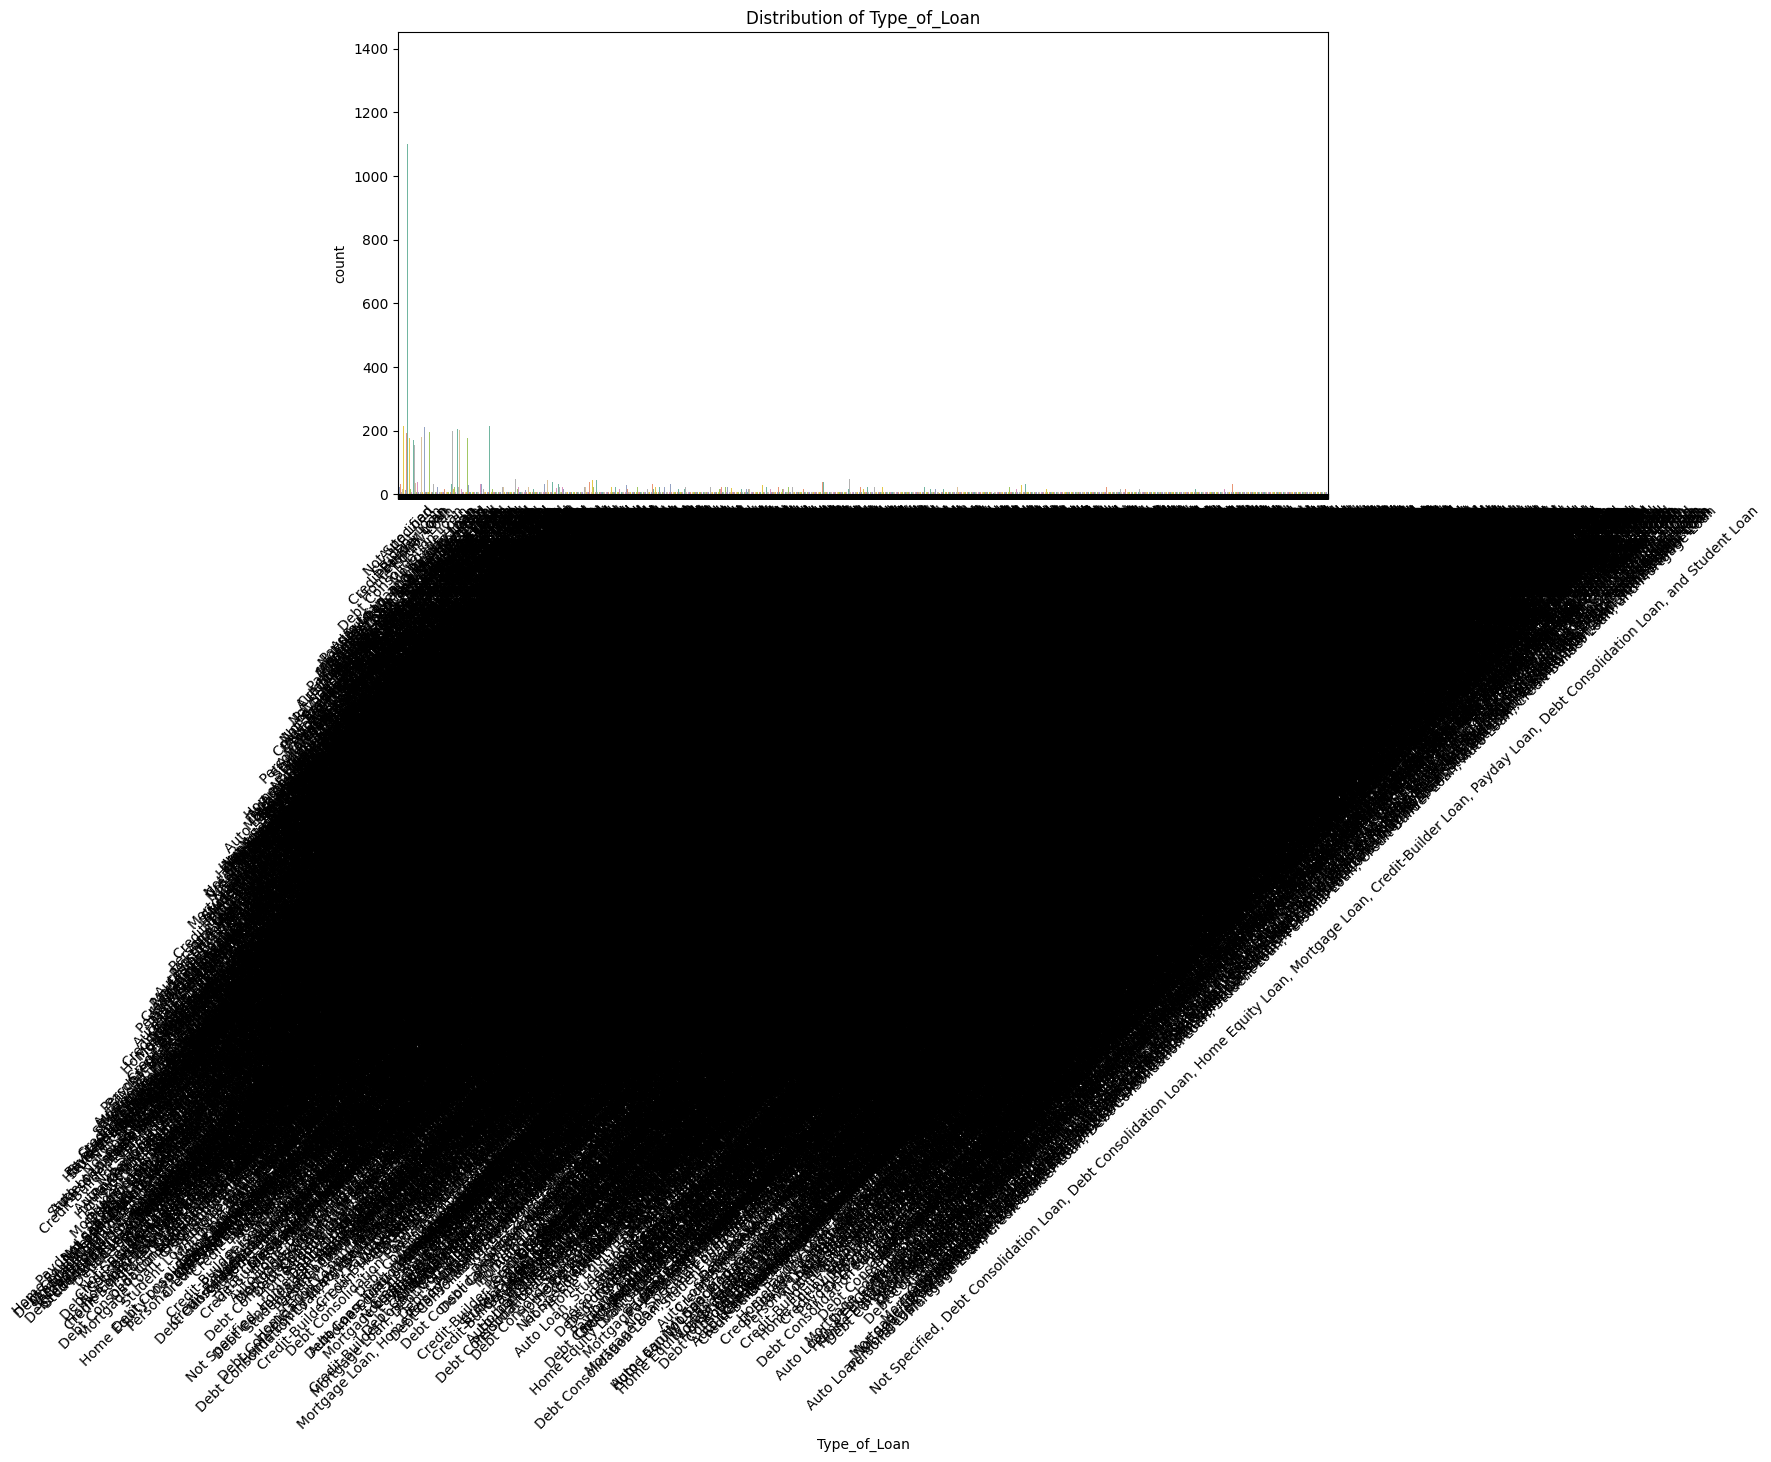

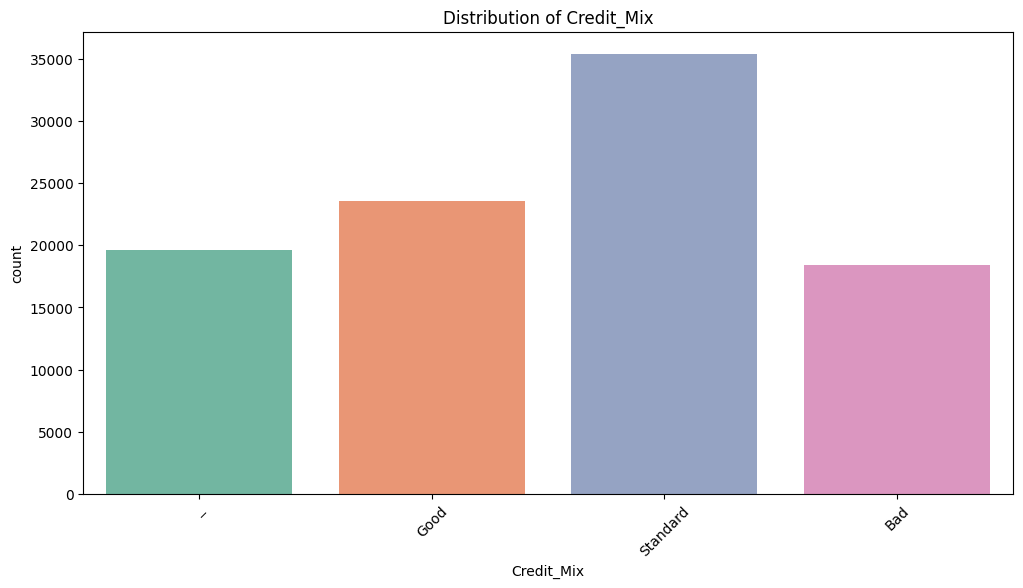

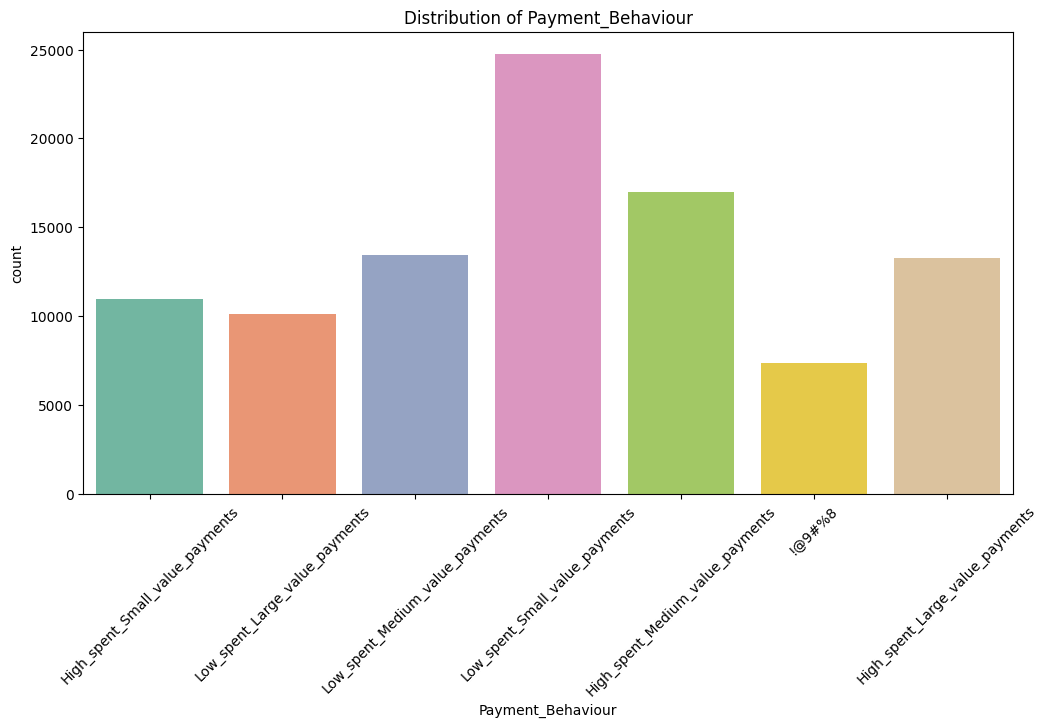

In [20]:
# Creating bar plots for categorical data
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [21]:
# Get unique values for each column
unique_occupation = df['Occupation'].unique()
unique_type_of_loan = df['Type_of_Loan'].unique()
unique_credit_mix = df['Credit_Mix'].unique()
unique_payment_behaviour = df['Payment_Behaviour'].unique()

In [22]:
# Display unique values
print("Unique values for 'occupation':", unique_occupation)

Unique values for 'occupation': ['Scientist' '_______' 'Teacher' nan 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


In [23]:
print("Unique values for 'type_of_loan':", unique_type_of_loan)

Unique values for 'type_of_loan': ['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']


In [24]:
print("Unique values for 'payment_behaviour':", unique_payment_behaviour)

Unique values for 'payment_behaviour': ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments' nan]


In [25]:
print("Unique values for 'credit_mix':", unique_credit_mix)

Unique values for 'credit_mix': ['_' 'Good' nan 'Standard' 'Bad']


**Missing Data Handling**

In [26]:
# Check the percentage of missing data per column
missing_percentages = df.isnull().sum() / len(df) * 100
print(missing_percentages[missing_percentages > 0].sort_values(ascending=False))

Monthly_Inhand_Salary       17.453
Type_of_Loan                14.068
Name                        12.664
Credit_History_Age          11.766
Num_of_Delayed_Payment       9.780
Amount_invested_monthly      7.327
Num_Credit_Inquiries         4.786
Monthly_Balance              4.100
Occupation                   3.028
Num_of_Loan                  3.009
Credit_Utilization_Ratio     3.007
ID                           2.984
Age                          2.980
Payment_Behaviour            2.980
Delay_from_due_date          2.965
Month                        2.965
Credit_Mix                   2.953
SSN                          2.945
Total_EMI_per_month          2.937
Interest_Rate                2.934
Customer_ID                  2.933
Outstanding_Debt             2.932
Num_Credit_Card              2.929
Credit_Score                 2.920
Num_Bank_Accounts            2.910
Payment_of_Min_Amount        2.910
Annual_Income                2.902
Changed_Credit_Limit         2.887
dtype: float64


As the missing percentage is high for 'Monthly_Inhand_Salary', 'Type_of_Loan', 'Name', 'Credit_History_Age',

In [27]:
# Convert 'Num_of_Delayed_Payment' to numeric, setting errors='coerce' to handle non-numeric data
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')